In [27]:
from google.colab import drive
drive.mount('/content/drive')
!pip install rdflib
!pip install pandas
!pip install datetime
!pip install matplotlib
from rdflib import Graph
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
owl_file_path =  r'./sample_data/MX3D.owl'

In [18]:
graph = Graph()
graph.parse(owl_file_path, format="xml")  # Specify format as OWL

<Graph identifier=N86c524d783df4c2c81383b2762394e6c (<class 'rdflib.graph.Graph'>)>

In [19]:
# Create a SPARQL query to return all the triples in the graph
query_all = """
SELECT ?subject ?predicate ?object
WHERE {
  ?subject ?predicate ?object
}
"""

# Execute the SPARQL query
all_the_things = graph.query(query_all)

# Print the results
for row in all_the_things:
    print(row)

(rdflib.term.URIRef('http://www.semanticweb.org/adelforouzi/ontologies/2019/6/untitled-ontology-5#detect_overlapping'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'))
(rdflib.term.URIRef('http://www.semanticweb.org/adelforouzi/ontologies/2019/6/untitled-ontology-5#Pressure_Recognizable_Features'), rdflib.term.URIRef('http://purl.org/dc/elements/1.1/creator'), rdflib.term.Literal('adelforouzi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://www.semanticweb.org/adelforouzi/ontologies/2019/6/untitled-ontology-5#Non_organic_non_metalic_materials'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://www.semanticweb.org/adelforouzi/ontologies/2019/6/untitled-ontology-5#Materials'))
(rdflib.term.URIRef('http://www.semanticweb.org/adelforouzi/ontologies/2019/6/untitled-ontology-5#CT_Rescale_Type'), rdfli

In [23]:
Prefix_String = """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
            PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
            PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
            PREFIX owl: <http://www.w3.org/2002/07/owl#>
            SELECT ?entity
            where {  ?entity rdfs:domain
            """


Query_String = Prefix_String + ':Temperature_Sensor}';#Robot_Position_and_Axis_Sensor Temperature_Sensor Welding_Current_and_Voltage
# Execute the SPARQL query
all_the_things = graph.query(Query_String)

# Print the results
for row in all_the_things:
    print(row)

(rdflib.term.URIRef('http://www.semanticweb.org/adelforouzi/ontologies/2023/7/untitled-ontology-74#Temperature'),)
(rdflib.term.URIRef('http://www.semanticweb.org/adelforouzi/ontologies/2023/7/untitled-ontology-74#Timestamp'),)


In [24]:
ontores = []
i = 0
for row in all_the_things:
        res = str(row)
        # print(res)
        res = res[res.find("#") + 1:]
        ontores.append(res[:res.find("'")])
        #ontores.append("\n")
        print(ontores[i])
        i = i + 1

Temperature
Timestamp


In [4]:

# Define CSV file path (replace with your actual path)
csv_file_path =  r'./sample_data/temperature.csv'

# Read CSV data into a DataFrame
df = pd.read_csv(csv_file_path, delimiter=";")

# Print the DataFrame
print(df)

                       Timestamp  Temperature
0     2022-11-30T14:39:12.446085         50.0
1     2022-11-30T14:39:45.930381         50.0
2     2022-11-30T14:40:02.418661         50.0
3     2022-11-30T14:40:19.268754         92.5
4     2022-11-30T14:40:35.736417         66.1
...                          ...          ...
3846  2022-11-30T16:04:25.252728        253.1
3847  2022-11-30T16:04:25.781996        250.3
3848  2022-11-30T16:04:26.301175        247.9
3849  2022-11-30T16:04:44.887630        182.8
3850  2022-11-30T16:05:01.820072        234.9

[3851 rows x 2 columns]


In [28]:
def PlotChannels(df,ontologyoutput):

    ind = 0
    for item in ontologyoutput:
        Pure_Channel_Name = item.strip()
        ind = ind + 1
        if ind == len(ontologyoutput):
            continue
        print("Checking Channel:", Pure_Channel_Name)

        if Pure_Channel_Name not in df.columns:
            print(f"Channel {Pure_Channel_Name} not found in the CSV file.")
            continue

        if Pure_Channel_Name == 'Timestamp':
            print("Skipping Timestamp column for plotting.")
            continue

        # Ensure that the 'Timestamp' column exists for x-axis labels
        if 'Timestamp' not in df.columns:
            print("Timestamp column not found in the CSV file.")
            continue

        ave_vec = df[Pure_Channel_Name].dropna().tolist()
        timestamps = df['Timestamp'].dropna().tolist()

        # Convert timestamps to seconds and remove the bias time
        timestamps_in_seconds = [(datetime.fromisoformat(ts) - datetime.fromisoformat(timestamps[0])).total_seconds() for ts in timestamps]

        fig, ax = plt.subplots()

        fave_array = [float(str(value).replace(",", ".")) for value in ave_vec]

        ax.plot(timestamps_in_seconds, fave_array)
        ax.set_yticks([round(min(fave_array)), round((min(fave_array) + max(fave_array)) / 2), round(max(fave_array))])
        ax.set_xlabel('Time (seconds)')
        ax.set_ylabel(Pure_Channel_Name)
        ax.set_title(f'{Pure_Channel_Name} over Time')

        plt.tight_layout()

        plt.show()
        plt.clf()
        plt.close('all')
        #ave_vec = []

Checking Channel: Temperature


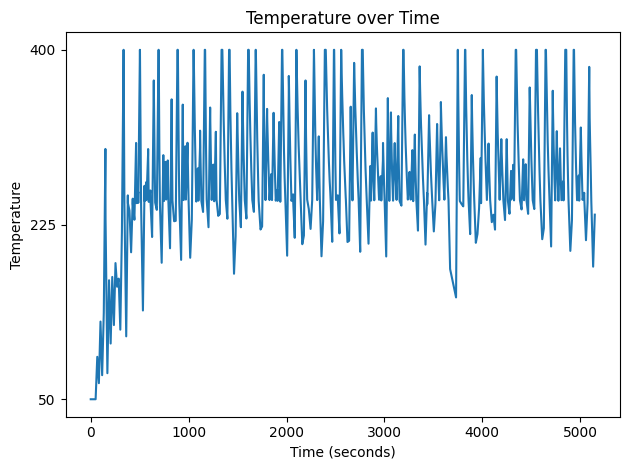

In [29]:
PlotChannels(df,ontores)